In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  

np.set_printoptions(suppress=True,  # 지수 표기법 억제 (예: 1e-10 대신 0.0000000001로 표시)
                    precision=8)    # 소수점 이하 자리수를 8자리로 표현

# 데이터 준비

In [2]:
# hitter1 = pd.read_csv('data/2000_2001_hitter.csv')
# hitter2 = pd.read_csv('data/2002_2013_hitter.csv')
# hitter3 = pd.read_csv('data/2014_hitter.csv')

hitter1 = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/2000_2001_hitter.csv')
hitter2 = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/2002_2013_hitter.csv')
hitter3 = pd.read_csv('https://raw.githubusercontent.com/JayoungKim-ai/ML_dataset/refs/heads/main/2014_hitter.csv')

print(f'hitter1 >>> {hitter1.shape}')
print(f'hitter2 >>> {hitter2.shape}')
print(f'hitter3 >>> {hitter3.shape}')

display(hitter1.head(3))
display(hitter2.head(3))
display(hitter3.head(3))

hitter1 >>> (89, 36)
hitter2 >>> (505, 39)
hitter3 >>> (55, 39)


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,OBP,SLG,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2000박종호,2000,1,박종호,현대,0.340,121,541,441,150,...,0.428023,0.489796,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804
1,2000김동주,2000,2,김동주,두산,0.339,127,539,469,159,...,0.413729,0.603412,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000
2,2000브리또,2000,3,브리또,SK,0.338,103,452,405,137,...,0.398664,0.533333,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,R,...,MH,RISP,PH-BA,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2002장성호,2002,1,장성호,KIA,0.343,133,586,481,82,...,48,0.365,0.0,0.178794,0.365904,1.047904,116.003072,9.104892,0.412689,106.706
1,2002마해영,2002,2,마해영,삼성,0.323,133,596,532,92,...,53,0.313,0.0,0.268797,0.359023,1.002674,120.662819,8.573411,0.413068,110.578
2,2002이승엽,2002,3,이승엽,삼성,0.323,133,617,511,123,...,47,0.331,0.0,0.365949,0.538160,1.267409,157.375689,11.770481,0.468948,136.108


,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,R,...,MH,RISP,PH-BA,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,2014서건창,2014,1,서건창,넥센,0.370,128,616,543,135,...,66,0.390,0.0,0.176796,0.342541,1.097222,139.001623,10.254218,0.424498,120.634
1,2014김태균,2014,2,김태균,한화,0.365,118,508,422,66,...,44,0.354,0.0,0.199052,0.360190,1.100694,110.631890,10.194748,0.441970,97.816
2,2014손아섭,2014,3,손아섭,롯데,0.362,122,570,483,105,...,54,0.336,0.0,0.175983,0.356108,1.106918,125.666667,10.603125,0.428663,110.456


In [3]:
# 데이터프레임 병합 
hitter_concat = pd.concat([hitter1, hitter2, hitter3], 
                          ignore_index=True) # 기존 인덱스 무시
hitter_concat.tail()

,YrPlayer,Year,Rank,Player,Team,AVG,G,PA,AB,H,...,TA,RC,RC/27,wOBA,XR,R,SAC,MH,RISP,PH-BA
644,2014이범호,2014,51,이범호,KIA,0.269,105,406,350,94,...,0.884328,64.894286,6.441712,0.369291,63.468,47.0,0.0,24.0,0.293,0.000
645,2014모창민,2014,52,모창민,NC,0.263,122,468,419,110,...,0.676647,53.028291,4.138046,0.319970,55.644,62.0,8.0,22.0,0.263,0.667
646,2014오지환,2014,53,오지환,LG,0.262,113,464,397,104,...,0.818182,64.147759,5.463689,0.336344,63.404,72.0,6.0,21.0,0.359,0.000
647,2014조동화,2014,54,조동화,SK,0.262,125,522,443,116,...,0.539359,48.898621,3.520701,0.293759,48.544,74.0,28.0,26.0,0.328,0.143
648,2014김재호,2014,55,김재호,두산,0.252,122,421,341,86,...,0.620818,41.969406,3.867488,0.304498,44.468,50.0,13.0,21.0,0.298,0.000


In [4]:
# 변수 선택
X = hitter_concat[['OPS','ISO','SECA','TA','RC','RC/27','wOBA','XR']]
y = hitter_concat['YrPlayer']

print(X.shape, y.shape)
display(X.head())
display(y.head())


(649, 8) (649,)


,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,0.917819,0.149660,0.297052,0.976667,100.354529,8.286154,0.400138,92.804
1,1.017141,0.264392,0.379531,1.063830,115.473840,9.306847,0.431993,105.000
2,0.931997,0.195062,0.274074,0.931655,86.204956,8.224501,0.400969,77.820
3,1.031229,0.284188,0.423077,1.110092,119.916981,9.811389,0.436688,107.594
4,0.932665,0.231504,0.324582,0.923588,82.605677,7.125729,0.394586,80.284


0     2000박종호 
1     2000김동주 
2     2000브리또 
3     2000송지만 
4    2000데이비스 
Name: YrPlayer, dtype: object

<Axes: >

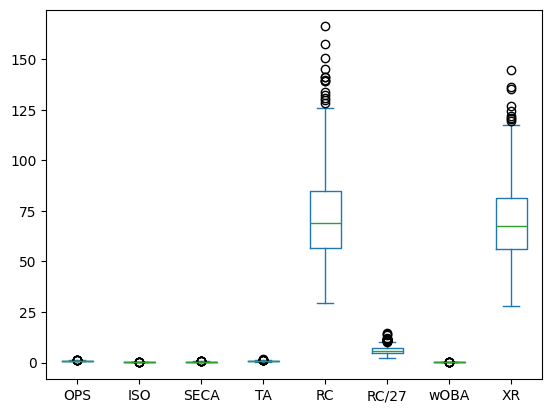

In [5]:
# 데이터 분포 확인
X.plot(kind='box')

In [6]:
# 데이터 스케일링
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X.loc[:,:] = scaler.fit_transform(X)
X.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133


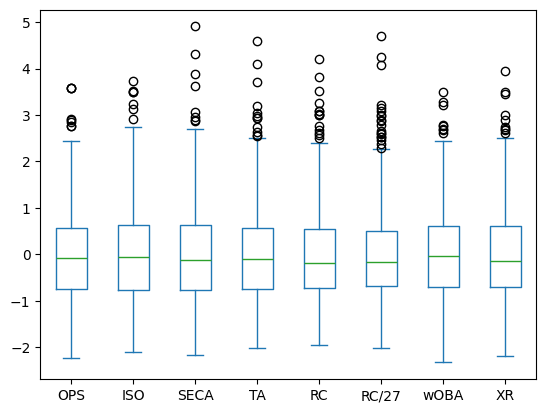

In [7]:
X.plot(kind='box');

# k-means clustering

### 최적의 k 찾기

In [8]:
# 엘보우 기법으로 최적의 k 찾기

from sklearn.cluster import KMeans

inertia = []
for n in range(2, 7) :
    km_i = KMeans(n_clusters=n)
    km_i.fit(X)
    print(f'{n} : {km_i.inertia_}')
    inertia.append(km_i.inertia_)

2 : 2225.7814969700885
3 : 1334.9614684794224
4 : 1025.562124874354
5 : 850.9461282511699
6 : 738.1526654441549


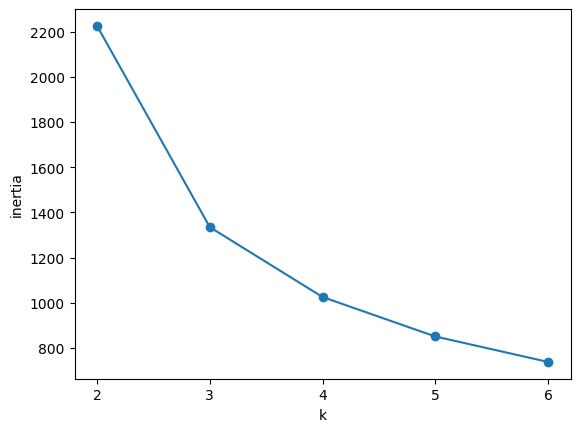

In [9]:
# inertia 시각화
plt.plot(range(2,7), inertia, marker='o')
plt.xticks(range(2,7))
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

### 군집화

In [79]:
k = 4
km = KMeans(n_clusters=k)
kmeans_cluster = km.fit_predict(X)



In [80]:
from sklearn.metrics import silhouette_score
print(f'실루엣 점수 : {silhouette_score(X, kmeans_cluster)}')

실루엣 점수 : 0.3549427587256934


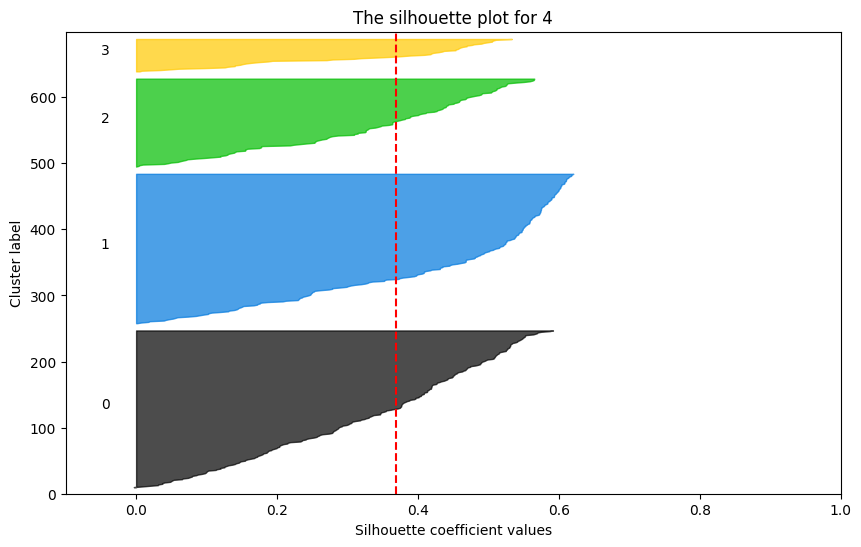

In [81]:
import silhouette_analysis2 as sa
sa.silhouette_plot(X, k)

### 군집화 결과 분석

In [82]:
# 데이터프레임 생성

df = pd.DataFrame(X, columns=X.columns)
df['kmeans_cluster'] = kmeans_cluster
df.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334,1
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449,2
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202,1
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235,2
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133,1


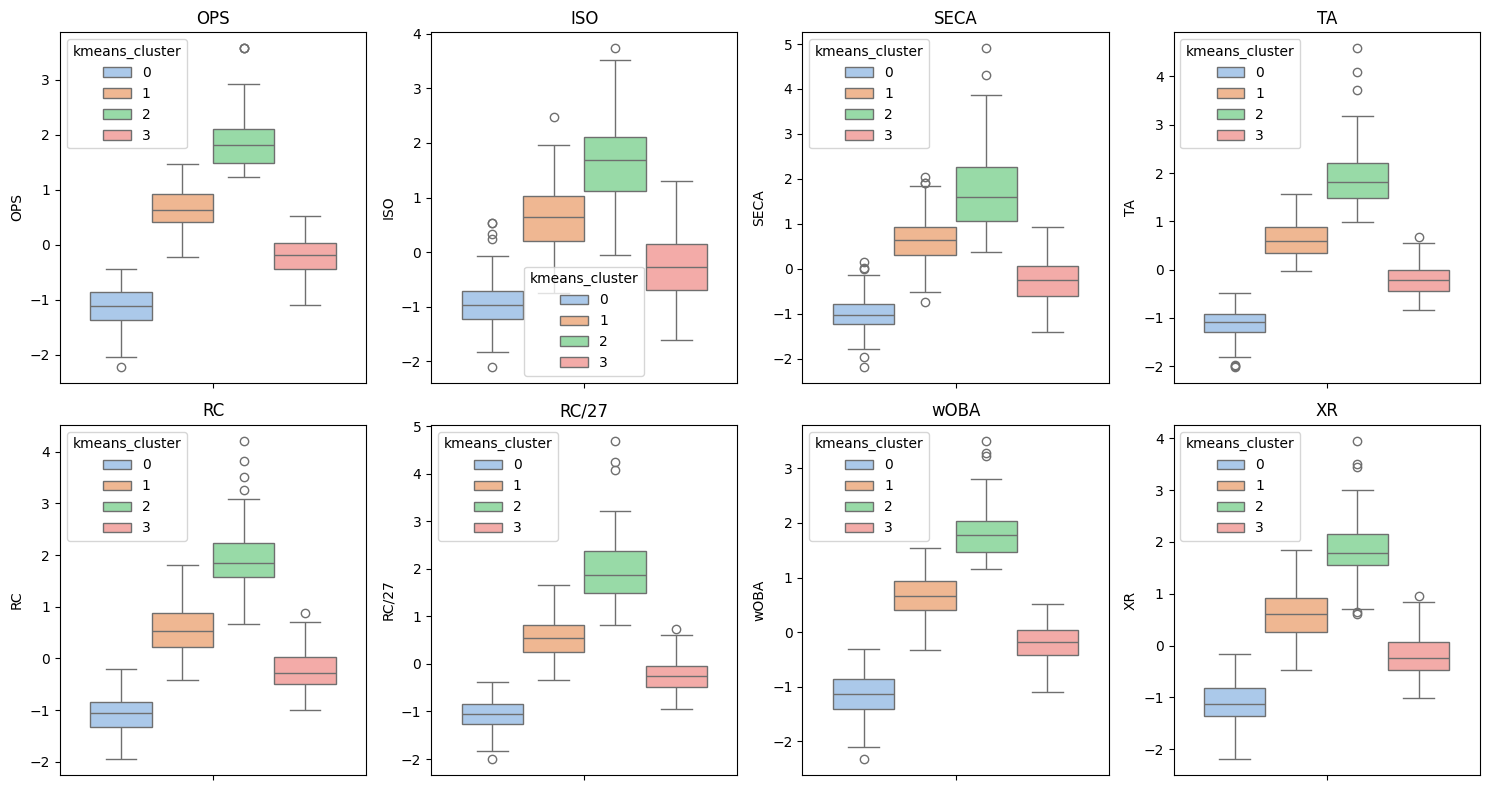

In [83]:
# 군집의 데이터 특징 분석

cols=df.columns[:-1]

plt.figure(figsize=(15,8))
for i, col in enumerate(cols) :
    plt.subplot(2,4,i+1)
    sns.boxplot(data=df, y=col, hue='kmeans_cluster', palette='pastel')
    plt.title(col)

plt.tight_layout()

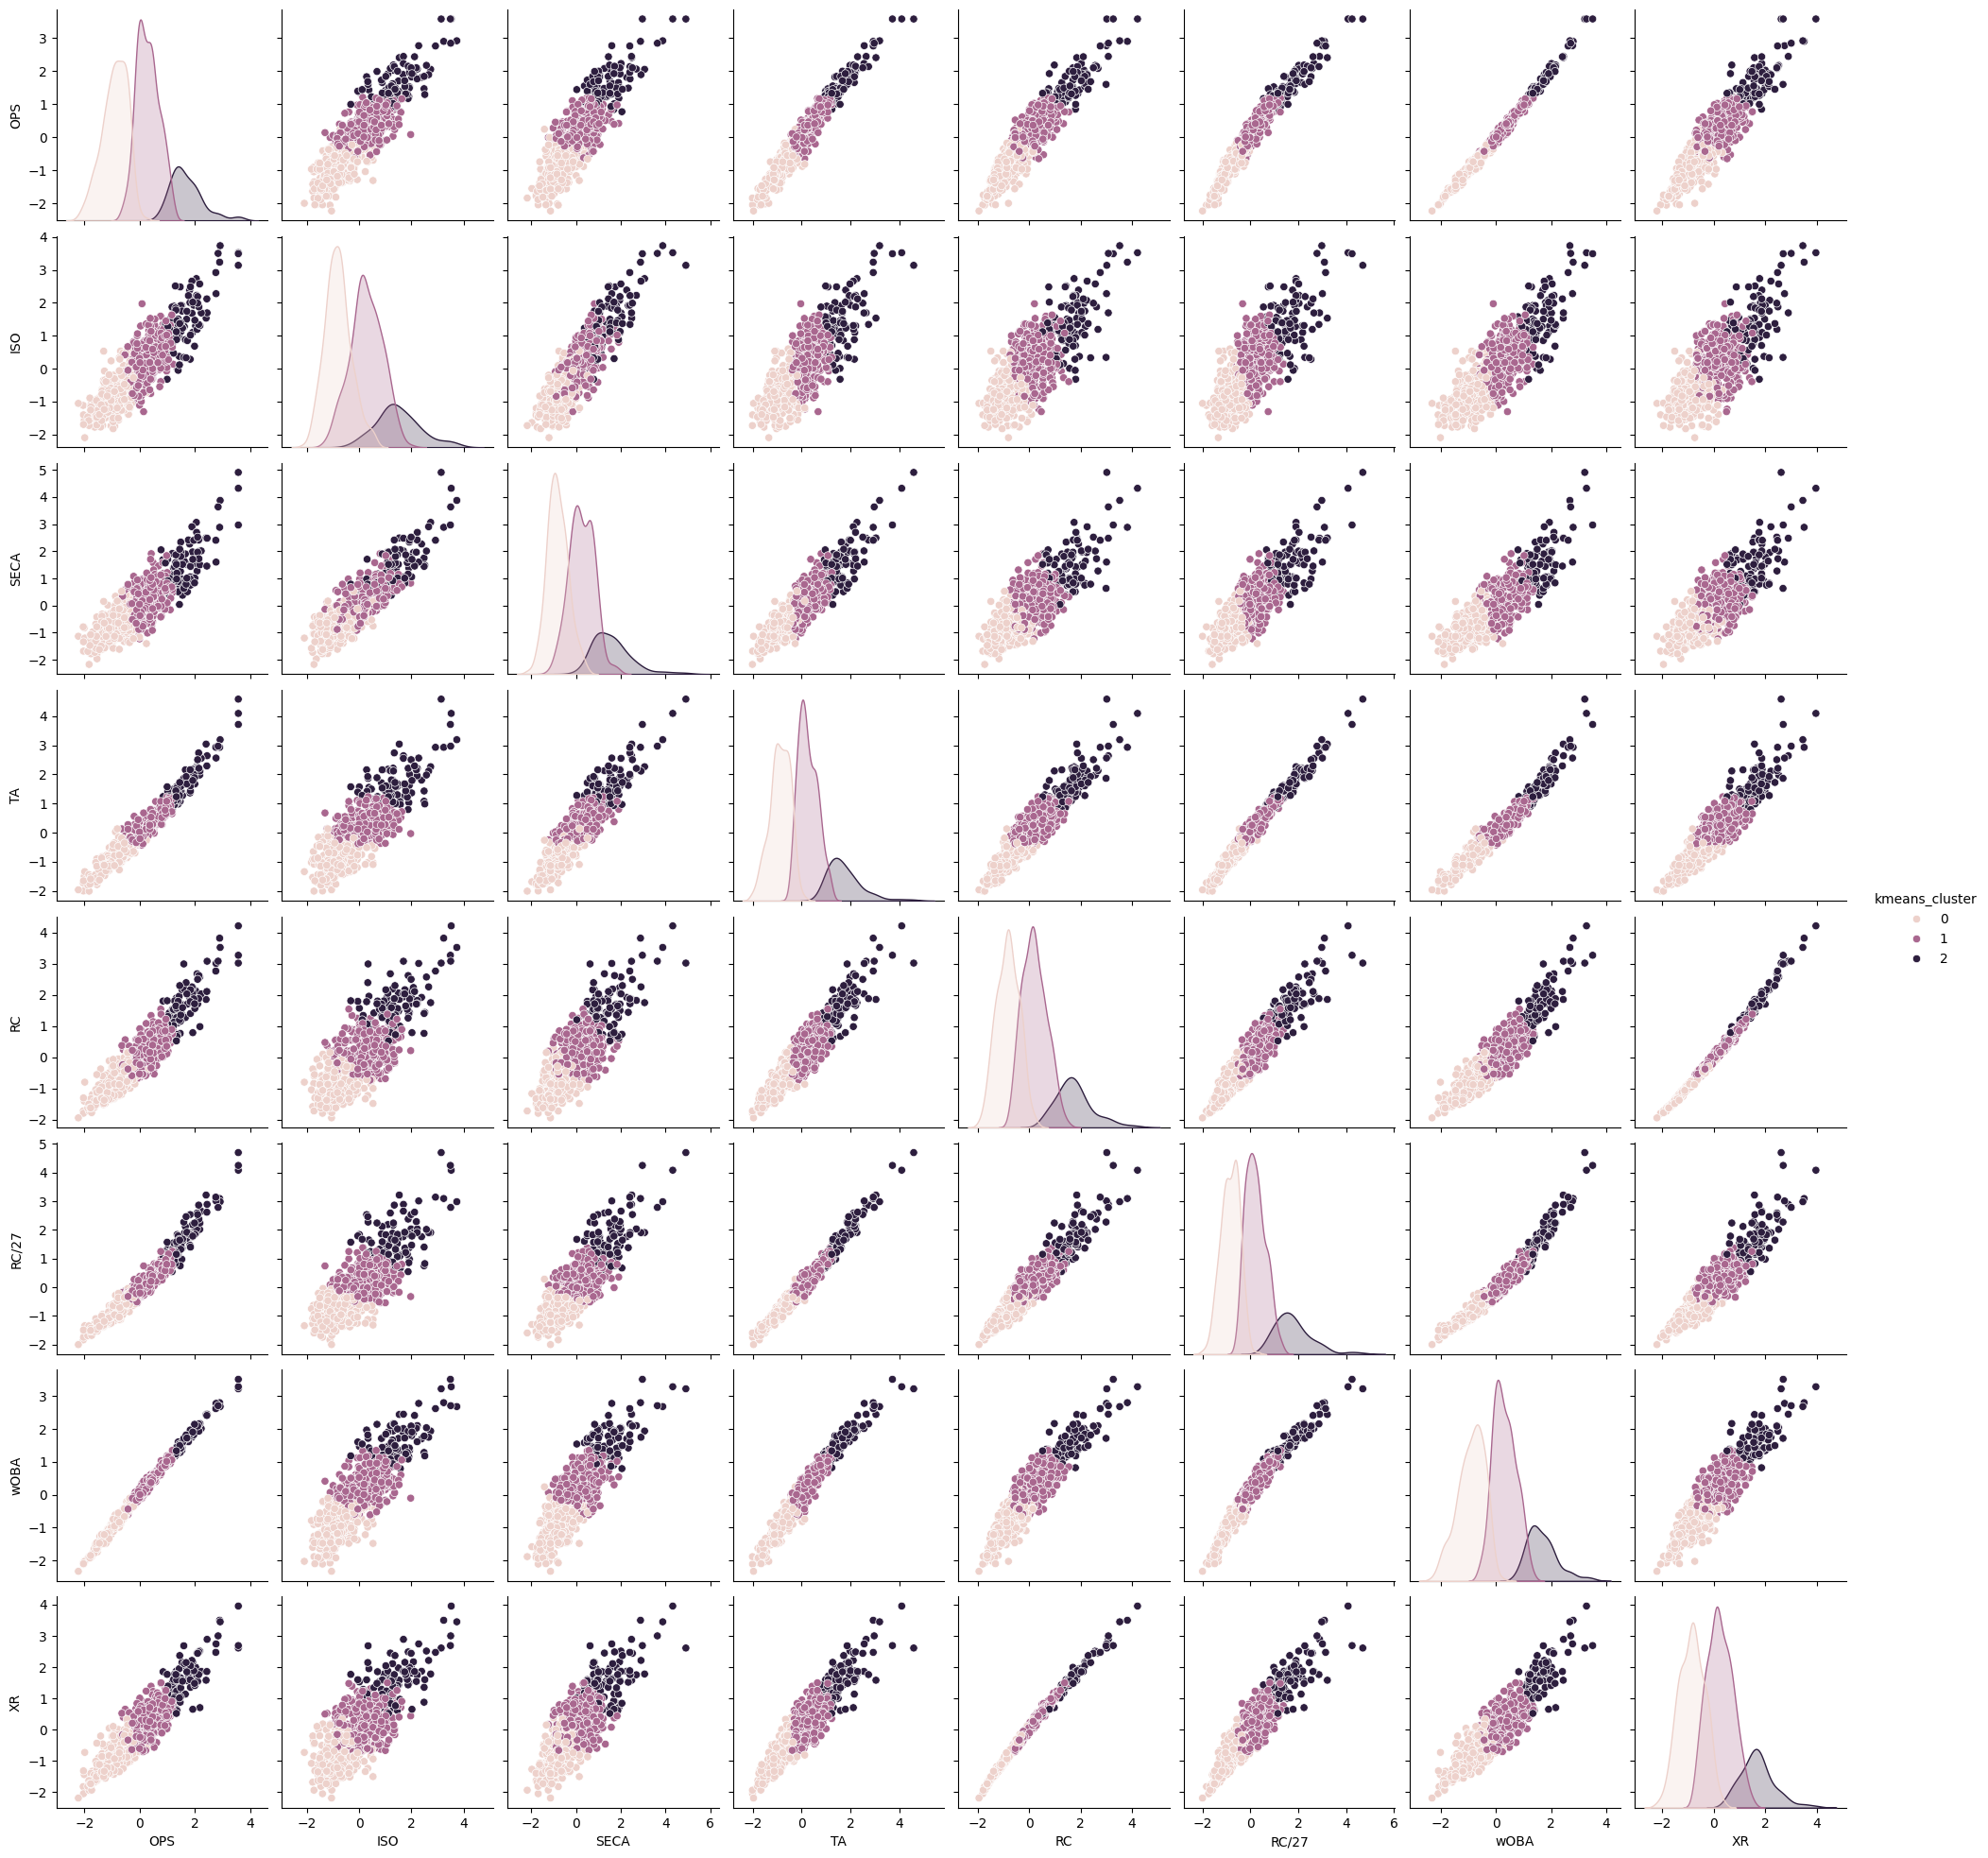

In [28]:
sns.pairplot(data=df, hue='kmeans_cluster')

In [84]:
# 개별 데이터 실루엣 계수 컬럼 추가

from sklearn.metrics import silhouette_samples
df['silhouette'] = silhouette_samples(X, kmeans_cluster)
df.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhouette
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334,1,0.414997
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449,2,0.455042
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202,1,0.453349
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235,2,0.539985
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133,1,0.532405


In [85]:
# 잘못 군집화 된 클러스터

df.loc[df['silhouette'] < 0]

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhouette
46,1.392525,1.059135,0.792982,1.095561,1.643927,1.149681,1.312186,1.714441,2,-0.015242
51,1.418101,1.006983,0.885979,1.482684,1.246756,1.464470,1.442076,1.201784,2,-0.016608
100,1.228187,1.898462,1.379617,1.030534,1.379926,0.853908,1.154385,1.487906,2,-0.034000
159,-0.876686,-1.082517,-0.555034,-0.613754,-0.375097,-0.650434,-0.719472,-0.313409,3,-0.007155
160,-0.700508,-0.498703,-0.431269,-0.771439,-0.571844,-0.883361,-0.667911,-0.525390,3,-0.005509
207,-1.006502,-0.743168,-0.291155,-0.644567,-0.320359,-0.883467,-1.006221,-0.211636,3,-0.013311
218,1.339458,1.043044,1.092171,1.378643,1.269341,1.488217,1.295335,1.234266,2,-0.023228
260,1.552727,1.226894,0.374729,1.275151,1.347593,1.602141,1.578233,1.171410,2,-0.020667
265,-0.579964,-0.699132,-1.293184,-0.843801,-0.286542,-0.499556,-0.678211,-0.381538,3,-0.027934
404,1.348730,1.459850,1.865826,1.587891,0.666156,1.523542,1.381501,0.607603,2,-0.039754


In [86]:
# 클러스터 별 중심 player

df['Player'] = y
max_idx = df.groupby('kmeans_cluster')['silhouette'].idxmax()
df.loc[max_idx]

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhouette,Player
214,-1.256862,-0.778017,-1.138993,-1.398256,-1.312502,-1.226364,-1.301864,-1.364140,0,0.621589,2004조인성
626,0.922192,1.000493,0.626534,0.771725,0.840296,0.574636,0.891493,0.992439,1,0.570835,2014이택근
470,2.146172,1.873921,1.721852,2.208859,2.618612,2.375373,1.930496,2.485800,2,0.543470,2011최형우
529,-0.283242,-0.364817,-0.076024,-0.138572,-0.338842,-0.251772,-0.215243,-0.272594,3,0.557026,2012나지완


# 주성분분석

In [87]:
# 모든 특성(컬럼)에 대해 주성분 계산하여 각 데이터포인트를 주성분 공간으로 변환

from sklearn.decomposition import PCA
pca = PCA()
principal_components = pca.fit_transform(X)


In [ ]:
# 컬럼별 설명된 분산 비율 확인
explained_variance = pca.explained_variance_ratio_


In [ ]:
# 누적분산 확인
cumulative_variance = explained_variance.cumsum()

In [88]:
# 2개의 주성분 추출
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)
principal_components

array([[ 2.48864775, -1.29871071],
       [ 4.8638416 , -0.32843484],
       [ 2.05850718, -0.4397998 ],
       ...,
       [-0.3971905 ,  0.69084294],
       [-3.94087277, -0.42488303],
       [-3.33227219,  0.22550401]], shape=(649, 2))

In [89]:
# 주성분으로 군집화

k2=4
km2 = KMeans(n_clusters=k2)
pca_cluster = km2.fit_predict(principal_components)

print(f'실루엣 점수 : {silhouette_score(principal_components, pca_cluster)}')


실루엣 점수 : 0.41824262268426426


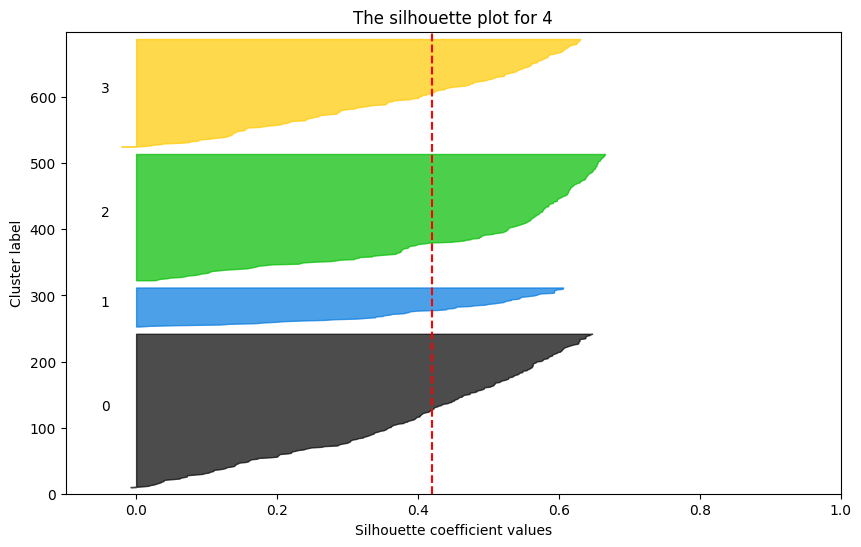

In [90]:
import silhouette_analysis2 as sa
sa.silhouette_plot(principal_components, k2)

<Axes: xlabel='pcal1', ylabel='pca2'>

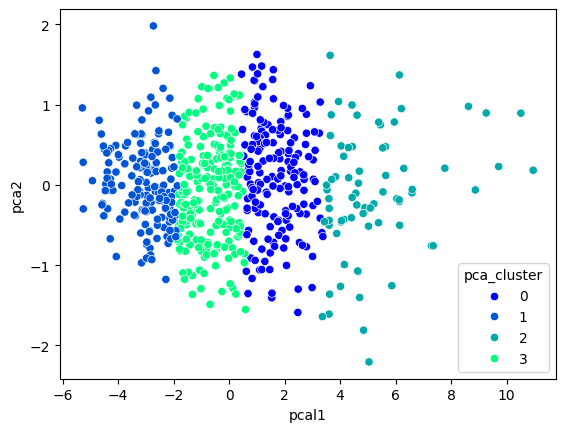

In [91]:
# 군집 결과 시각화
df_pca = pd.DataFrame(principal_components, columns=['pcal1', 'pca2'])
df_pca['pca_cluster'] = pca_cluster

sns.scatterplot(data=df_pca, x='pcal1', y='pca2', hue='pca_cluster', palette='winter')

# PCA를 하거나 하지 않은 경우 군집 결과 비교

In [92]:
df.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhouette,Player
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334,1,0.414997,2000박종호
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449,2,0.455042,2000김동주
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202,1,0.453349,2000브리또
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235,2,0.539985,2000송지만
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133,1,0.532405,2000데이비스


In [93]:
df['pca_cluster'] = pca_cluster
df.head()

,OPS,ISO,SECA,TA,RC,RC/27,wOBA,XR,kmeans_cluster,silhouette,Player,pca_cluster
0,0.976149,-0.074229,0.104176,1.108646,1.248725,1.204841,1.118807,1.214334,1,0.414997,2000박종호,0
1,1.897116,1.679891,1.054165,1.654227,1.929967,1.758231,1.894866,1.857449,2,0.455042,2000김동주,2
2,1.107616,0.619910,-0.160485,0.826902,0.611178,1.171415,1.139040,0.424202,1,0.453349,2000브리또,0
3,2.027750,1.982543,1.555727,1.943794,2.130165,2.031780,2.009248,1.994235,2,0.539985,2000송지만,2
4,1.113814,1.177062,0.421269,0.776410,0.449003,0.575692,0.983538,0.554133,1,0.532405,2000데이비스,0


In [94]:
df[['kmeans_cluster', 'pca_cluster']].value_counts()

kmeans_cluster  pca_cluster
3               3              235
0               1              168
1               0              167
2               2               69
1               2                5
3               0                4
0               3                1
Name: count, dtype: int64